In [1]:
"""

This is for B/D estimation of galaxies by CNN,
By Kenji Bekki, on 2018/3/30
For test only.

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
#batch_size = 200
#num_classes = 3
#epochs = 1
#nb_epoch=epochs

n_mesh=50
#n_mesh=20

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh

#input_shape = (img_rows, img_cols, 1)

# For output the galaxy classification results
f1=open('test27.out','w')

# This is for simlation data sets
with open('2dft.dat') as f:
  lines=f.readlines()

#nmodel0=int(input('Input the total number of images per model '))
#nmodel=nmodel0
nmodel=1000
print('nmodel',nmodel)

#nmodel=30000

x_train=np.zeros((nmodel,n_mesh3))
x_test=np.zeros((nmodel,n_mesh3))
y_train=np.zeros(nmodel,dtype=np.int)
y_test=np.zeros(nmodel,dtype=np.int)



#y_test=np.zeros(nmodel)
#print(y_train)

# For 2D density map data
ibin=0
jbin=-1
for num,j in enumerate(lines):
  jbin=jbin+1
  tm=j.strip().split()
  x_train[ibin,jbin]=float(tm[0])
  x_test[ibin,jbin]=float(tm[0])
#  print('ibin,jbin',ibin,jbin)
  if jbin == n_mesh2:
    ibin+=1
    jbin=-1

ntest=ibin
print(ntest)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

y_vec=np.zeros(2)
#print(y_vec)

y_pred=loaded_model.predict(x_test)
print(y_pred[:ntest])

f1.write( str(ntest) + "\n" )

for i in range(ntest):
  for j in range(2):
   y_vec[j]=y_pred[i,j]
#  print(y_vec)
#  y_type=np.argmax(y_vec)
#  prob=y_vec[y_type]
   prob=y_vec[j]
   print('i=',i,'j',j,'B/D',prob)
#   f1.write( str(prob) +"\n" )
#  f1.write( str(y_type) + ' ' + str(prob) +"\n" )
  f1.write( str(y_vec[0]) + ' ' + str(y_vec[1]) +  "\n")
#  str(y_vec[1]) + "\n" )
#  str(y_vec[1]) + ' ' + str(y_vec[2]) + "\n" )
f1.flush()
#loaded_model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])





nmodel 1000
1000
Loaded model from disk
[[4.2850413 4.138596 ]
 [4.2939925 4.147363 ]
 [4.291389  4.1370897]
 ...
 [4.327271  4.1853786]
 [4.3237543 4.1753216]
 [4.3148074 4.1678305]]
i= 0 j 0 B/D 4.285041332244873
i= 0 j 1 B/D 4.138596057891846
i= 1 j 0 B/D 4.293992519378662
i= 1 j 1 B/D 4.147363185882568
i= 2 j 0 B/D 4.291388988494873
i= 2 j 1 B/D 4.137089729309082
i= 3 j 0 B/D 4.2785820960998535
i= 3 j 1 B/D 4.138733863830566
i= 4 j 0 B/D 4.272816181182861
i= 4 j 1 B/D 4.118841171264648
i= 5 j 0 B/D 4.26757287979126
i= 5 j 1 B/D 4.127100944519043
i= 6 j 0 B/D 4.244594573974609
i= 6 j 1 B/D 4.094380855560303
i= 7 j 0 B/D 4.233199596405029
i= 7 j 1 B/D 4.094849109649658
i= 8 j 0 B/D 4.203240871429443
i= 8 j 1 B/D 4.056714057922363
i= 9 j 0 B/D 4.191255569458008
i= 9 j 1 B/D 4.049795627593994
i= 10 j 0 B/D 4.376743793487549
i= 10 j 1 B/D 4.229913711547852
i= 11 j 0 B/D 4.385911464691162
i= 11 j 1 B/D 4.239225387573242
i= 12 j 0 B/D 4.384927272796631
i= 12 j 1 B/D 4.229823589324951
i= 1

i= 165 j 1 B/D 4.247056484222412
i= 166 j 0 B/D 4.373072624206543
i= 166 j 1 B/D 4.219236850738525
i= 167 j 0 B/D 4.3637919425964355
i= 167 j 1 B/D 4.219046115875244
i= 168 j 0 B/D 4.341902732849121
i= 168 j 1 B/D 4.1928935050964355
i= 169 j 0 B/D 4.33251428604126
i= 169 j 1 B/D 4.185401916503906
i= 170 j 0 B/D 4.083763122558594
i= 170 j 1 B/D 3.947059154510498
i= 171 j 0 B/D 4.091955661773682
i= 171 j 1 B/D 3.955232620239258
i= 172 j 0 B/D 4.086724758148193
i= 172 j 1 B/D 3.9427261352539062
i= 173 j 0 B/D 4.074212074279785
i= 173 j 1 B/D 3.9438164234161377
i= 174 j 0 B/D 4.064731121063232
i= 174 j 1 B/D 3.9207663536071777
i= 175 j 0 B/D 4.0600199699401855
i= 175 j 1 B/D 3.9285919666290283
i= 176 j 0 B/D 4.034826278686523
i= 176 j 1 B/D 3.893482208251953
i= 177 j 0 B/D 4.022029876708984
i= 177 j 1 B/D 3.892001152038574
i= 178 j 0 B/D 3.9935381412506104
i= 178 j 1 B/D 3.855182647705078
i= 179 j 0 B/D 3.9806411266326904
i= 179 j 1 B/D 3.8468122482299805
i= 180 j 0 B/D 4.484398365020752
i

i= 335 j 0 B/D 4.494880199432373
i= 335 j 1 B/D 4.347658157348633
i= 336 j 0 B/D 4.427809238433838
i= 336 j 1 B/D 4.269314765930176
i= 337 j 0 B/D 4.421586036682129
i= 337 j 1 B/D 4.273163318634033
i= 338 j 0 B/D 4.336697101593018
i= 338 j 1 B/D 4.1883158683776855
i= 339 j 0 B/D 4.327688694000244
i= 339 j 1 B/D 4.182205677032471
i= 340 j 0 B/D 4.3275604248046875
i= 340 j 1 B/D 4.182693958282471
i= 341 j 0 B/D 4.336865425109863
i= 341 j 1 B/D 4.191930770874023
i= 342 j 0 B/D 4.337944507598877
i= 342 j 1 B/D 4.1850152015686035
i= 343 j 0 B/D 4.32731294631958
i= 343 j 1 B/D 4.188556671142578
i= 344 j 0 B/D 4.334845542907715
i= 344 j 1 B/D 4.181634902954102
i= 345 j 0 B/D 4.329617977142334
i= 345 j 1 B/D 4.1888041496276855
i= 346 j 0 B/D 4.330063819885254
i= 346 j 1 B/D 4.1796650886535645
i= 347 j 0 B/D 4.31985330581665
i= 347 j 1 B/D 4.178770542144775
i= 348 j 0 B/D 4.32423210144043
i= 348 j 1 B/D 4.176777362823486
i= 349 j 0 B/D 4.315750598907471
i= 349 j 1 B/D 4.168643474578857
i= 350 j

i= 483 j 0 B/D 4.271811008453369
i= 483 j 1 B/D 4.134945392608643
i= 484 j 0 B/D 4.274036884307861
i= 484 j 1 B/D 4.1230082511901855
i= 485 j 0 B/D 4.268664836883545
i= 485 j 1 B/D 4.13001012802124
i= 486 j 0 B/D 4.260666370391846
i= 486 j 1 B/D 4.1124396324157715
i= 487 j 0 B/D 4.250080585479736
i= 487 j 1 B/D 4.111573696136475
i= 488 j 0 B/D 4.242146015167236
i= 488 j 1 B/D 4.09695291519165
i= 489 j 0 B/D 4.2325849533081055
i= 489 j 1 B/D 4.0887980461120605
i= 490 j 0 B/D 4.368743419647217
i= 490 j 1 B/D 4.217376708984375
i= 491 j 0 B/D 4.377468585968018
i= 491 j 1 B/D 4.225801944732666
i= 492 j 0 B/D 4.3690056800842285
i= 492 j 1 B/D 4.21000862121582
i= 493 j 0 B/D 4.35755729675293
i= 493 j 1 B/D 4.211863994598389
i= 494 j 0 B/D 4.33678674697876
i= 494 j 1 B/D 4.1779704093933105
i= 495 j 0 B/D 4.333590984344482
i= 495 j 1 B/D 4.186595916748047
i= 496 j 0 B/D 4.288789749145508
i= 496 j 1 B/D 4.134352207183838
i= 497 j 0 B/D 4.278346538543701
i= 497 j 1 B/D 4.136162757873535
i= 498 j 

i= 646 j 1 B/D 3.9545507431030273
i= 647 j 0 B/D 4.085803985595703
i= 647 j 1 B/D 3.9534056186676025
i= 648 j 0 B/D 4.062316417694092
i= 648 j 1 B/D 3.9221737384796143
i= 649 j 0 B/D 4.050367832183838
i= 649 j 1 B/D 3.9137606620788574
i= 650 j 0 B/D 4.295201301574707
i= 650 j 1 B/D 4.146745681762695
i= 651 j 0 B/D 4.303985595703125
i= 651 j 1 B/D 4.1551690101623535
i= 652 j 0 B/D 4.300103187561035
i= 652 j 1 B/D 4.143978118896484
i= 653 j 0 B/D 4.287461280822754
i= 653 j 1 B/D 4.145502090454102
i= 654 j 0 B/D 4.277865409851074
i= 654 j 1 B/D 4.122324466705322
i= 655 j 0 B/D 4.272727012634277
i= 655 j 1 B/D 4.130564212799072
i= 656 j 0 B/D 4.242916584014893
i= 656 j 1 B/D 4.090977191925049
i= 657 j 0 B/D 4.231470584869385
i= 657 j 1 B/D 4.092194557189941
i= 658 j 0 B/D 4.1919169425964355
i= 658 j 1 B/D 4.044623851776123
i= 659 j 0 B/D 4.179548740386963
i= 659 j 1 B/D 4.038560390472412
i= 660 j 0 B/D 4.3995680809021
i= 660 j 1 B/D 4.249034881591797
i= 661 j 0 B/D 4.408475399017334
i= 661

i= 814 j 1 B/D 4.183248996734619
i= 815 j 0 B/D 4.33107852935791
i= 815 j 1 B/D 4.190293312072754
i= 816 j 0 B/D 4.332727432250977
i= 816 j 1 B/D 4.182344913482666
i= 817 j 0 B/D 4.32254695892334
i= 817 j 1 B/D 4.181358337402344
i= 818 j 0 B/D 4.3288254737854
i= 818 j 1 B/D 4.181396007537842
i= 819 j 0 B/D 4.320477485656738
i= 819 j 1 B/D 4.17312479019165
i= 820 j 0 B/D 4.319009304046631
i= 820 j 1 B/D 4.167489051818848
i= 821 j 0 B/D 4.327348232269287
i= 821 j 1 B/D 4.175360202789307
i= 822 j 0 B/D 4.318081378936768
i= 822 j 1 B/D 4.159238338470459
i= 823 j 0 B/D 4.306127548217773
i= 823 j 1 B/D 4.160606384277344
i= 824 j 0 B/D 4.288074016571045
i= 824 j 1 B/D 4.129978656768799
i= 825 j 0 B/D 4.283144474029541
i= 825 j 1 B/D 4.137660026550293
i= 826 j 0 B/D 4.237691879272461
i= 826 j 1 B/D 4.083845138549805
i= 827 j 0 B/D 4.226667404174805
i= 827 j 1 B/D 4.0859246253967285
i= 828 j 0 B/D 4.165191173553467
i= 828 j 1 B/D 4.017771244049072
i= 829 j 0 B/D 4.153064250946045
i= 829 j 1 B/D

i= 981 j 1 B/D 4.115889549255371
i= 982 j 0 B/D 4.257073402404785
i= 982 j 1 B/D 4.106290340423584
i= 983 j 0 B/D 4.244629859924316
i= 983 j 1 B/D 4.10783576965332
i= 984 j 0 B/D 4.2422404289245605
i= 984 j 1 B/D 4.091699123382568
i= 985 j 0 B/D 4.2367424964904785
i= 985 j 1 B/D 4.0988240242004395
i= 986 j 0 B/D 4.220330715179443
i= 986 j 1 B/D 4.072851657867432
i= 987 j 0 B/D 4.209217071533203
i= 987 j 1 B/D 4.072093486785889
i= 988 j 0 B/D 4.1884846687316895
i= 988 j 1 B/D 4.04400634765625
i= 989 j 0 B/D 4.177318096160889
i= 989 j 1 B/D 4.035869598388672
i= 990 j 0 B/D 4.344306945800781
i= 990 j 1 B/D 4.1978068351745605
i= 991 j 0 B/D 4.353471755981445
i= 991 j 1 B/D 4.2067718505859375
i= 992 j 0 B/D 4.35344934463501
i= 992 j 1 B/D 4.198901176452637
i= 993 j 0 B/D 4.342945575714111
i= 993 j 1 B/D 4.202518463134766
i= 994 j 0 B/D 4.34704065322876
i= 994 j 1 B/D 4.192389965057373
i= 995 j 0 B/D 4.342109203338623
i= 995 j 1 B/D 4.199697017669678
i= 996 j 0 B/D 4.337562084197998
i= 996 j

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial

In [3]:
pv = pd.read_csv('test27.out', sep=" ", skiprows=1, header=None, names=["fd", "Rd"]) #predicted fd and Rd values
tfdv = pd.read_csv('2dftn1.dat', header=None, names=["fd"]) #true fd values
tRdv = pd.read_csv('2dftn2.dat', header=None, names=["Rd"]) #true fd and Rd values

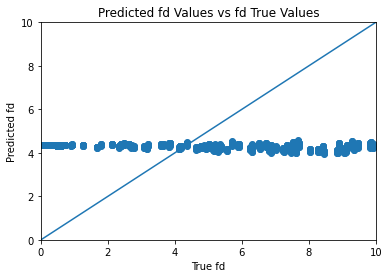

In [4]:
plt.scatter(tfdv, pv["fd"])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0, 10], [0, 10])
plt.title("Predicted fd Values vs fd True Values")
plt.xlabel("True fd")
plt.ylabel("Predicted fd")
plt.show()

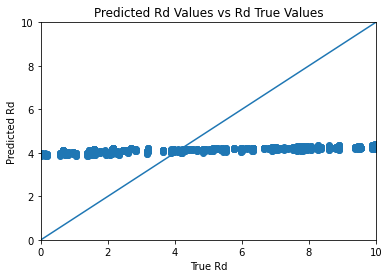

In [5]:
plt.scatter(tRdv, pv["Rd"])
plt.title("Predicted Rd Values vs Rd True Values")
plt.xlabel("True Rd")
plt.ylabel("Predicted Rd")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0,10],[0,10])
plt.show()

In [6]:
tfdv_flat = tfdv.to_numpy().flatten()
pfdv_flat = pv["fd"].to_numpy().flatten()
tRdv_flat = tRdv.to_numpy().flatten()
pRdv_flat = pv["Rd"].to_numpy().flatten()

def cos_dis(u, v):
    return (1 - np.dot(u, v)/(np.linalg.norm(u)*np.linalg.norm(v)))

In [7]:
#scipy.spatial.distance.cosine(tfdv_flat, pfdv_flat)

In [8]:
from sklearn import metrics

binned_pfdv = pfdv_flat.reshape(-1, 10)
binned_tfdv = tfdv_flat.reshape(-1, 10)

cor_cos_dis = np.zeros(binned_pfdv.shape[0])
for i in range(binned_pfdv.shape[0]):
     cor_cos_dis[i] = (cos_dis(binned_pfdv[i], binned_tfdv[i]))

cor_cos_dis[0]

3.3371012100436026e-05

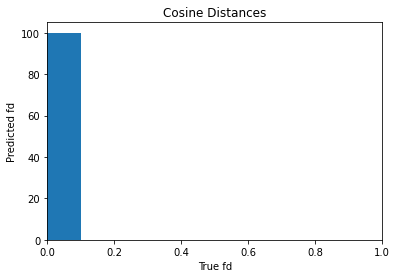

In [9]:
plt.hist(cor_cos_dis, bins=np.arange(0, 10, 0.1), histtype='stepfilled')
plt.title("Cosine Distances")
plt.xlabel("True fd")
plt.ylabel("Predicted fd")
plt.xlim(0, 1)
plt.show()

In [10]:
binned_pRdv = pRdv_flat.reshape(-1, 10)
binned_tRdv = tRdv_flat.reshape(-1, 10)

cor_cos_dis = np.zeros(binned_pRdv.shape[0])
for i in range(binned_pRdv.shape[0]):
     cor_cos_dis[i] = (cos_dis(binned_pRdv[i], binned_tRdv[i]))

cor_cos_dis[0]

3.278956249797016e-05

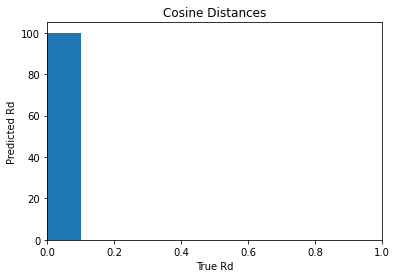

In [11]:
plt.hist(cor_cos_dis, bins=np.arange(0, 10, 0.1), histtype='stepfilled')
plt.title("Cosine Distances")
plt.xlabel("True Rd")
plt.ylabel("Predicted Rd")
plt.xlim(0, 1)
plt.show()

In [12]:
y = (np.histogram(cor_cos_dis, np.arange(0, 1.1, 0.1), weights=np.full(cor_cos_dis.shape, 1 / cor_cos_dis.shape[0]))[0])
x = np.arange(0.05, 1.05, 0.1)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


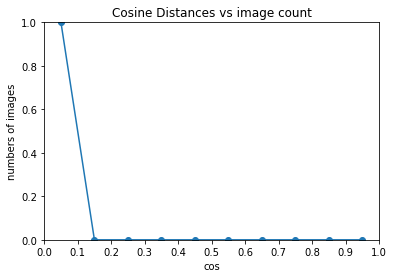

In [13]:
print(x)
print(y)
plt.scatter(x, y)
plt.plot(x, y)
plt.title("Cosine Distances vs image count")
plt.xlabel("cos")
plt.ylabel("numbers of images")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

In [14]:
cos_dis_arr = np.zeros(pfdv_flat.shape[0])

pv_arr = pv.to_numpy()
cv_arr = np.c_[tfdv_flat, tRdv_flat]

for i in range(pfdv_flat.shape[0]):
     cos_dis_arr[i] = (cos_dis(cv_arr[i] ,pv_arr[i]))
cos_dis_arr[10]

0.2393581712319457

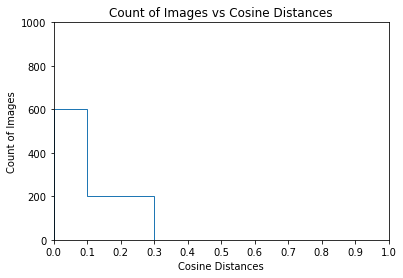

In [16]:
plt.hist(cos_dis_arr, bins=np.arange(0, 10, 0.1), histtype='step')
plt.title("Count of Images vs Cosine Distances")
plt.ylabel("Count of Images")
plt.xlabel("Cosine Distances")
plt.xlim(0, 1)
plt.ylim(0, 1000)
plt.xticks(np.arange(0, 1 + 0.1, 0.1))
plt.show()